## keras CNN using MNIST

Using TensorFlow backend.


In [64]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Conv2D, MaxPool2D

In [14]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 7s 1us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
X_train.shape, X_train[0].shape

((60000, 28, 28), (28, 28))

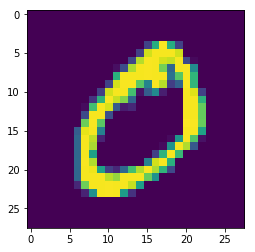

In [27]:
plt.imshow(X_train[1])

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [131]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [26]:
y_train_cat[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
y_train_cat2 = pd.get_dummies(y_train)
y_train_cat2[:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [32]:
y_train_cat.shape, y_train_cat2.shape

((60000, 10), (60000, 10))

In [33]:
type(y_train_cat), type(y_train_cat2)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [38]:
type(y_train_cat2.astype('float').values)

numpy.ndarray

In [41]:
y_train_cat2.astype('float').values[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [35]:
type(y_train_cat2.values)

numpy.ndarray

In [57]:
X_train.shape

(60000, 28, 28)

In [58]:
X_train = X_train.reshape(60000, 28,28,1)

In [59]:
X_train.shape

(60000, 28, 28, 1)

In [133]:
X_test.shape

(10000, 28, 28)

In [135]:
X_test = X_test.reshape(10000, 28,28,1)

In [126]:
K.clear_session()

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),input_shape=(28,28,1)))  # (-,28,28,1) x (3,3,1,32) -> (-, 26,26,32)
model.add(MaxPool2D(pool_size=(2,2), strides=None))

model.add(Activation('relu'))

# Conver the tensor to a long array
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [127]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
'''
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320         # -->  26 x 26 with 32 filters in output
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0           # -->  13 x 13 with 32 outputs
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0           # -->  13 * 13 * 32
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352      # --> 5408 * 128 + 128
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290        # --> 128 * 10 + 10
=================================================================
Total params: 693,962                                              # --> 320 + 692352 + 1290
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
'''

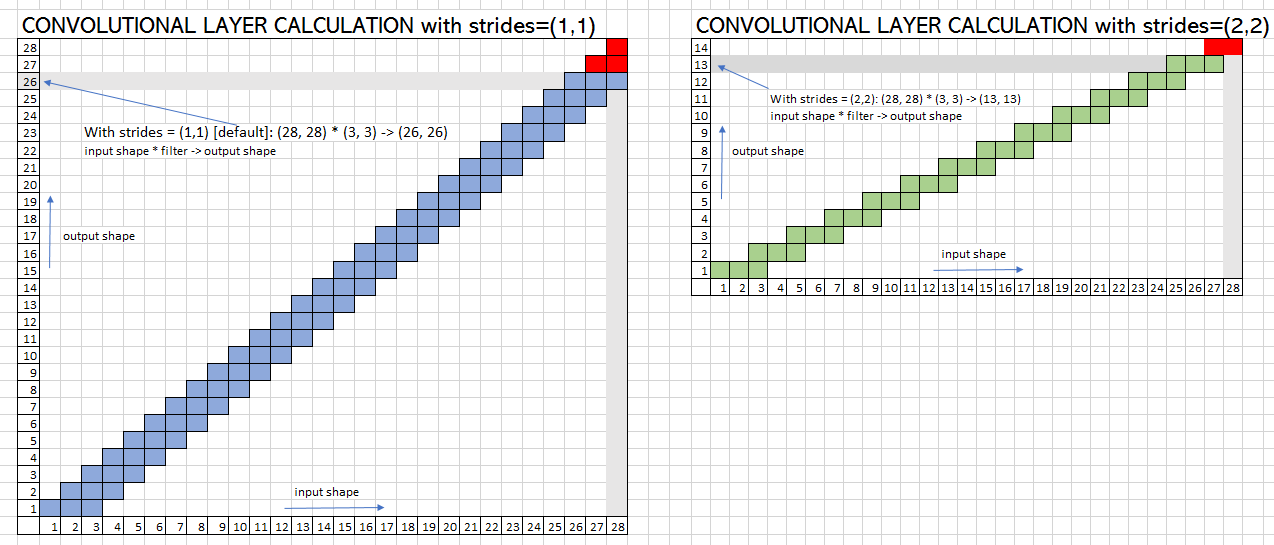

In [109]:
Image('../images/Udemy_Zero_to_deep_learning_Mosconi/CNN_convolution_calculation1.png', width=800, height=200) 

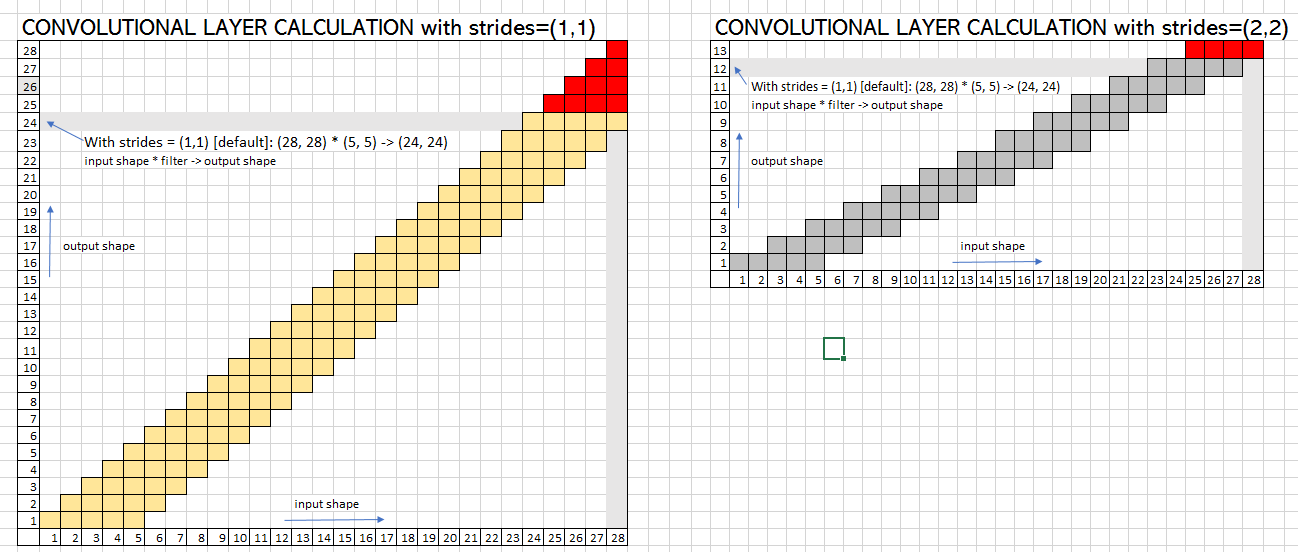

In [110]:
Image('../images/Udemy_Zero_to_deep_learning_Mosconi/CNN_convolution_calculation2.png', width=800, height=200) 

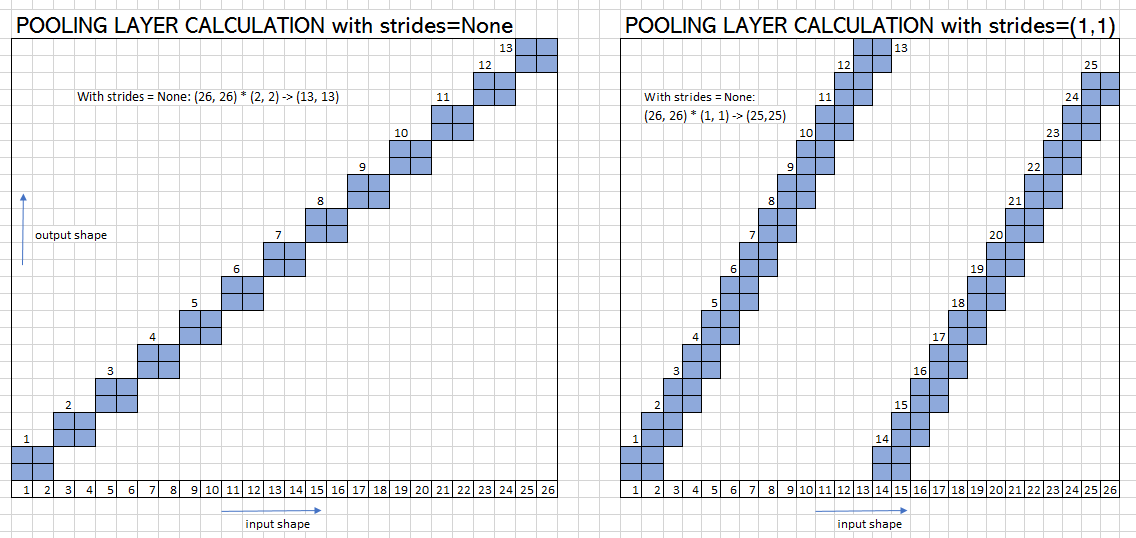

In [120]:
Image('../images/Udemy_Zero_to_deep_learning_Mosconi/CNN_pooling_layer_calculation.PNG', width=800, height=200) 

In [ ]:
NOTES:
Pooling:
    -> is used to reduce the number of trainable parameters, i.e, to reduce the spatial dimension of a feature map
    -> Spatial dimension of an input shape (4 x 4) will get reduced to (2 x 2) after applying a (2 x 2) pool filter, with strides = None
    -> strides = None implies strides = shape of the pool filter 

In [142]:
X_train.shape, y_train_cat.shape

((60000, 28, 28, 1), (60000, 10))

In [140]:
model.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 23s 559us/step - loss: 14.5450 - acc: 0.0976 - val_loss: 14.5573 - val_acc: 0.0968
Epoch 2/5
42000/42000 [==============================] - 23s 559us/step - loss: 14.5450 - acc: 0.0976 - val_loss: 14.5573 - val_acc: 0.0968
Epoch 3/5
42000/42000 [==============================] - 24s 561us/step - loss: 14.5450 - acc: 0.0976 - val_loss: 14.5573 - val_acc: 0.0968
Epoch 4/5
42000/42000 [==============================] - 24s 564us/step - loss: 14.5450 - acc: 0.0976 - val_loss: 14.5573 - val_acc: 0.0968
Epoch 5/5
42000/42000 [==============================] - 24s 566us/step - loss: 14.5450 - acc: 0.0976 - val_loss: 14.5573 - val_acc: 0.0968


In [141]:
+/  # Very bad model because accuracy is 0.09

10000/10000 [==============================] - 2s 171us/step


[14.535298265075683, 0.0982]

### TO DO: Exercise 1